# 資料統計
## 1. 資料內容
## 2. 視覺化圖表，以類別分區
## 3. 視覺化呈現資料以時間排列
## 4. 取出病患死亡時間

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import warnings
import seaborn as sns
import psycopg2

In [2]:
conn = psycopg2.connect(database="mimic", user="twmimicviewer", 
                        password="twmimicviewer@1234", host="203.145.218.182", port="5432")

## 連接上資料庫，抓取資料。

## 允許python執行postgresql語法
with conn.cursor() as cur:

    ## 觀察查詢筆數
    print(cur.rowcount)
    
    ## SQL語法
    sql = """
    SELECT * FROM sepsis.angus_cohort
    """
    
    ## 執行sql語法
    cur.execute(sql)
    
    ## 取得欄位名稱
    name = [desc[0] for desc in cur.description]
    
    ## fetchall是將所有收尋的資料都寫入 rows 中
    # rows = pd.DataFrame(cur.fetchall())
    angus_cohort = pd.DataFrame(cur.fetchall(),columns=name)

-1


In [3]:
angus_cohort.head()

,subject_id,hadm_id,icustay_id,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,dob,dod,gender,age,mortality_90d
0,21274,164354,298201,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,2127-12-23 00:00:00.000,2185-09-14 00:00:00.000,M,58,1
1,21277,127461,204941,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,None,2141-10-05 15:15:00.000,2063-12-13 00:00:00.000,2141-12-11 00:00:00.000,F,78,0
2,18936,166430,256303,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,2157-10-18 00:00:00.000,M,58,0
3,18936,166430,222141,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,2157-10-18 00:00:00.000,M,58,0
4,18936,166430,266076,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,2157-10-18 00:00:00.000,M,58,0


In [4]:
## 允許python執行postgresql語法
with conn.cursor() as cur:

    sql = """
    SELECT * FROM sepsis.gcs_24
    """
    cur.execute(sql)
    name = [desc[0] for desc in cur.description]
    GCS = pd.DataFrame(cur.fetchall(),columns=name)
    
    
    sql = """
    SELECT * FROM sepsis.lab_24
    """
    cur.execute(sql)
    name = [desc[0] for desc in cur.description]
    LAB = pd.DataFrame(cur.fetchall(),columns=name)
    
    
    sql = """
    SELECT * FROM sepsis.sapsii
    """
    cur.execute(sql)
    name = [desc[0] for desc in cur.description]
    SAPSII = pd.DataFrame(cur.fetchall(),columns=name)
    
    sql = """
    SELECT * FROM sepsis.uo_24
    """
    cur.execute(sql)
    name = [desc[0] for desc in cur.description]
    UO = pd.DataFrame(cur.fetchall(),columns=name)
    
    
    sql = """
    SELECT * FROM sepsis.vital_24
    """
    cur.execute(sql)
    name = [desc[0] for desc in cur.description]
    Vital = pd.DataFrame(cur.fetchall(),columns=name)

In [5]:
## 將六張表統整成一張，以icustay_id為標準

All = pd.merge(angus_cohort,GCS,on="icustay_id")
All = pd.merge(All,LAB,on="icustay_id")
All = pd.merge(All,SAPSII,on="icustay_id")
All = pd.merge(All,UO,on="icustay_id")
All = pd.merge(All,Vital,on="icustay_id")

In [6]:
All.head()

,subject_id_x,hadm_id_x,icustay_id,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,21274,164354,298201,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,21277,127461,204941,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,None,2141-10-05 15:15:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,18936,166430,256303,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,18936,166430,222141,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,18936,166430,266076,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [7]:
print(angus_cohort.shape)
len(pd.unique(angus_cohort.gender))

(16048, 15)


2

In [8]:
list(All.columns)

['subject_id_x',
 'hadm_id_x',
 'icustay_id',
 'los',
 'intime',
 'outtime',
 'first_careunit',
 'admittime',
 'deathtime',
 'dischtime',
 'dob',
 'dod',
 'gender',
 'age',
 'mortality_90d',
 'subject_id_y',
 'hadm_id_y',
 'mingcs',
 'gcsmotor',
 'gcsverbal',
 'gcseyes',
 'endotrachflag',
 'subject_id_x',
 'hadm_id_x',
 'aniongap_min',
 'aniongap_max',
 'albumin_min',
 'albumin_max',
 'bands_min',
 'bands_max',
 'bicarbonate_min',
 'bicarbonate_max',
 'bilirubin_min',
 'bilirubin_max',
 'creatinine_min',
 'creatinine_max',
 'chloride_min',
 'chloride_max',
 'glucose_min_x',
 'glucose_max_x',
 'hematocrit_min',
 'hematocrit_max',
 'hemoglobin_min',
 'hemoglobin_max',
 'lactate_min',
 'lactate_max',
 'platelet_min',
 'platelet_max',
 'potassium_min',
 'potassium_max',
 'ptt_min',
 'ptt_max',
 'inr_min',
 'inr_max',
 'pt_min',
 'pt_max',
 'sodium_min',
 'sodium_max',
 'bun_min',
 'bun_max',
 'wbc_min',
 'wbc_max',
 'subject_id_y',
 'hadm_id_y',
 'sapsii',
 'sapsii_prob',
 'age_score',
 'h

In [9]:
print('Number of ICU stays: ' + str(len(All.index.unique())))
print('Number of Mortality: ' + str(len(All[All['mortality_90d']==1].index.unique())))
print('Number of non-Mortality: ' + str(len(All[All['mortality_90d']==0].index.unique())))
print('Percentage of Mortality: ' + str(round(100*len(All[All['mortality_90d']==0].index.unique()) / len(All.index.unique()),1)) + '%')

Number of ICU stays: 14811
Number of Mortality: 4693
Number of non-Mortality: 10118
Percentage of Mortality: 68.3%


In [10]:
## 找出包含 hadm_id 字元

matching = [s for s in All.columns if "hadm_id" in s]

In [11]:
matching

['hadm_id_x', 'hadm_id_y', 'hadm_id_x', 'hadm_id_y', 'hadm_id_x', 'hadm_id_y']

In [12]:
## 一次分別篩選包含不同的字元

matching = [s for s in All.columns if "hadm_id" in s or "subject_id" in s]

In [13]:
matching

['subject_id_x',
 'hadm_id_x',
 'subject_id_y',
 'hadm_id_y',
 'subject_id_x',
 'hadm_id_x',
 'subject_id_y',
 'hadm_id_y',
 'subject_id_x',
 'hadm_id_x',
 'subject_id_y',
 'hadm_id_y']

In [14]:
All_f = All.drop(matching,axis=1)

In [15]:
list(All_f.columns)

['icustay_id',
 'los',
 'intime',
 'outtime',
 'first_careunit',
 'admittime',
 'deathtime',
 'dischtime',
 'dob',
 'dod',
 'gender',
 'age',
 'mortality_90d',
 'mingcs',
 'gcsmotor',
 'gcsverbal',
 'gcseyes',
 'endotrachflag',
 'aniongap_min',
 'aniongap_max',
 'albumin_min',
 'albumin_max',
 'bands_min',
 'bands_max',
 'bicarbonate_min',
 'bicarbonate_max',
 'bilirubin_min',
 'bilirubin_max',
 'creatinine_min',
 'creatinine_max',
 'chloride_min',
 'chloride_max',
 'glucose_min_x',
 'glucose_max_x',
 'hematocrit_min',
 'hematocrit_max',
 'hemoglobin_min',
 'hemoglobin_max',
 'lactate_min',
 'lactate_max',
 'platelet_min',
 'platelet_max',
 'potassium_min',
 'potassium_max',
 'ptt_min',
 'ptt_max',
 'inr_min',
 'inr_max',
 'pt_min',
 'pt_max',
 'sodium_min',
 'sodium_max',
 'bun_min',
 'bun_max',
 'wbc_min',
 'wbc_max',
 'sapsii',
 'sapsii_prob',
 'age_score',
 'hr_score',
 'sysbp_score',
 'temp_score',
 'pao2fio2_score',
 'uo_score',
 'bun_score',
 'wbc_score',
 'potassium_score',
 's

In [16]:
display.display(All_f.describe())

,icustay_id,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
count,14811.000000,14811.000000,14811.000000,14811.000000,14786.000000,14609.000000,14684.000000,14730.000000,14786.000000,14486.000000,...,14800.000000,14615.000000,14615.000000,14615.000000,14795.000000,14795.000000,14795.000000,14690.000000,14690.000000,14690.000000
mean,250054.566943,7.269390,65.009520,0.316859,13.509807,4.925594,2.707913,2.923354,0.312728,13.461963,...,19.977608,36.103287,37.604615,36.874100,90.512538,99.570909,96.968389,108.522422,256.557318,152.832665
std,28714.402675,9.077396,15.497262,0.465268,2.829444,1.730472,2.219425,1.188936,0.463620,3.691621,...,4.436917,0.884628,0.905112,0.729666,9.527865,1.370228,3.004000,36.576725,8249.633719,1179.352291
min,200003.000000,0.089200,19.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,7.000000,15.000000,32.200000,31.955555,2.000000,27.000000,11.166667,0.830000,21.000000,21.000000
25%,225285.500000,1.956400,55.000000,0.000000,14.000000,5.000000,0.000000,2.000000,0.000000,11.000000,...,16.818182,35.611111,36.999999,36.402778,90.000000,100.000000,95.920000,86.000000,130.000000,111.333333
50%,250404.000000,3.969900,67.000000,0.000000,15.000000,6.000000,4.000000,3.000000,0.000000,13.000000,...,19.416667,36.166666,37.500000,36.841270,93.000000,100.000000,97.440000,104.000000,164.000000,133.115556
75%,275026.500000,8.991550,78.000000,1.000000,15.000000,6.000000,5.000000,4.000000,1.000000,15.000000,...,22.571429,36.611112,38.166667,37.333333,95.000000,100.000000,98.708333,126.000000,218.000000,163.000000
max,299998.000000,173.072500,89.000000,1.000000,15.000000,6.000000,5.000000,4.000000,1.000000,47.000000,...,42.500000,39.722222,42.777778,40.103922,100.000000,100.000000,100.000000,480.000000,999999.000000,142966.857143


# 數據呈現
* count 數據總量
* mean 數據平均
* std 數據標準差
* 25%, 50%, 75% 數據四分位
* max 數據最大值

## 以上的數據並未區分90天內使否死亡

In [17]:
## 計算各欄位的筆數
All_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14811 entries, 0 to 14810
Data columns (total 98 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   icustay_id           14811 non-null  int64  
 1   los                  14811 non-null  float64
 2   intime               14811 non-null  object 
 3   outtime              14811 non-null  object 
 4   first_careunit       14811 non-null  object 
 5   admittime            14811 non-null  object 
 6   deathtime            3139 non-null   object 
 7   dischtime            14811 non-null  object 
 8   dob                  14811 non-null  object 
 9   dod                  8626 non-null   object 
 10  gender               14811 non-null  object 
 11  age                  14811 non-null  int64  
 12  mortality_90d        14811 non-null  int64  
 13  mingcs               14786 non-null  float64
 14  gcsmotor             14609 non-null  float64
 15  gcsverbal            14684 non-null 

In [18]:
## 只取float64和int64的資料
All_num = All_f.select_dtypes(include=['float64',"int64"])

All_num.head()

,icustay_id,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,9.8318,58,1,15.0,6.0,0.0,3.0,1.0,17.0,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,3.8644,78,0,15.0,4.0,0.0,1.0,1.0,13.0,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,1.3024,58,0,13.0,6.0,4.0,3.0,0.0,16.0,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,1.0441,58,0,15.0,6.0,5.0,4.0,0.0,12.0,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,13.8661,58,0,15.0,6.0,5.0,4.0,0.0,13.0,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


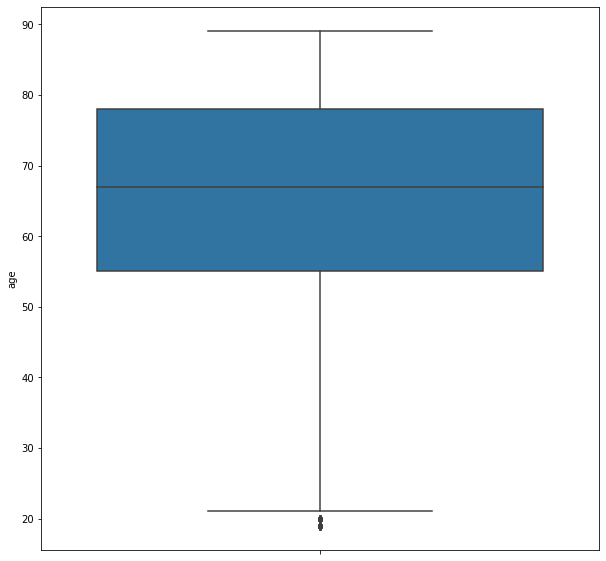

In [19]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(y="age", data=All_num)
plt.show()

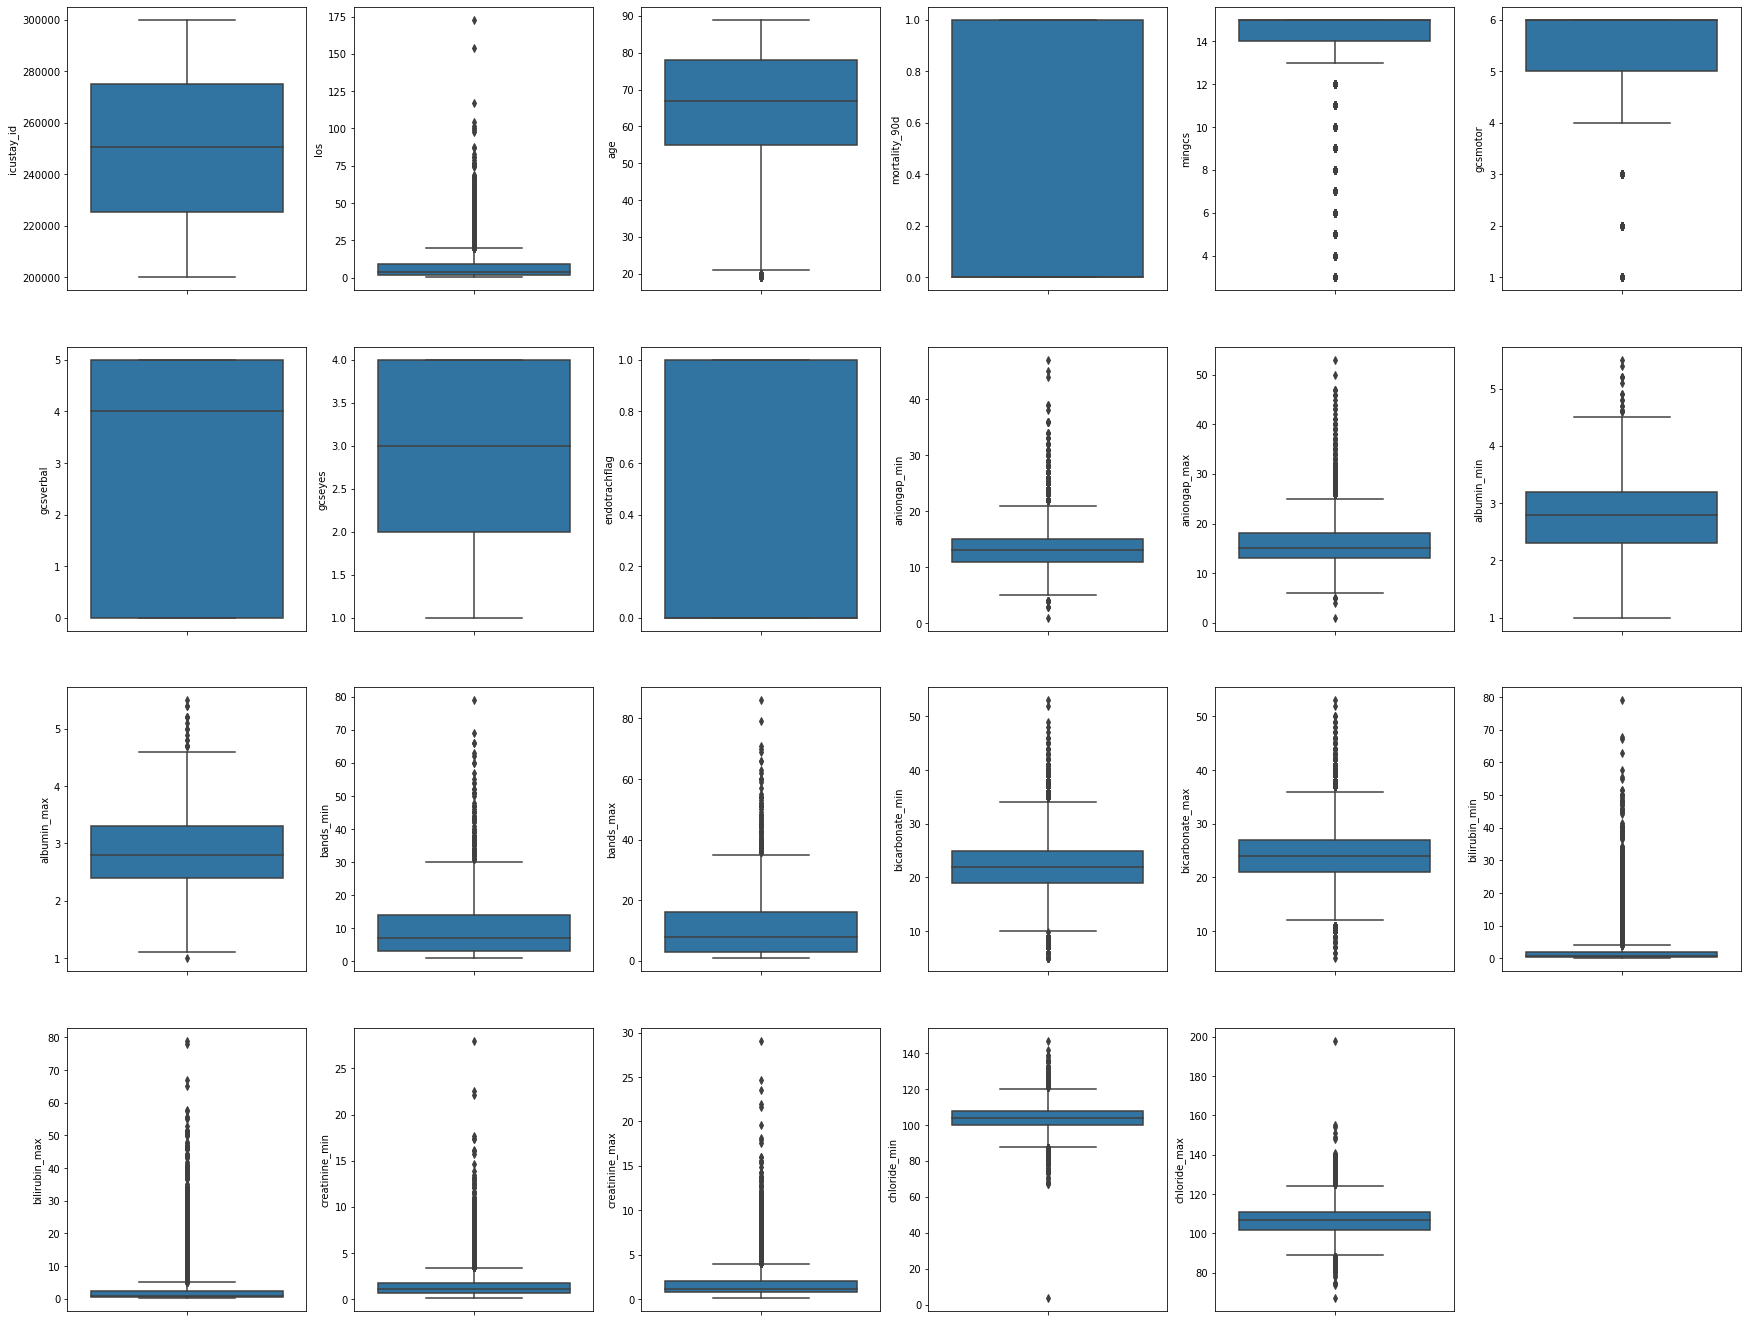

In [20]:
fig = plt.figure(figsize=(30,24))

count = 0
for variable in All_num.columns[:23]:
    count += 1
    
    ## 分割幾張圖
    plt.subplot(4, 6, count)
    
    ## 畫圖，y 為欄位的名稱，data 為資料
    ax = sns.boxplot(y=variable, data=All_num)

plt.show()

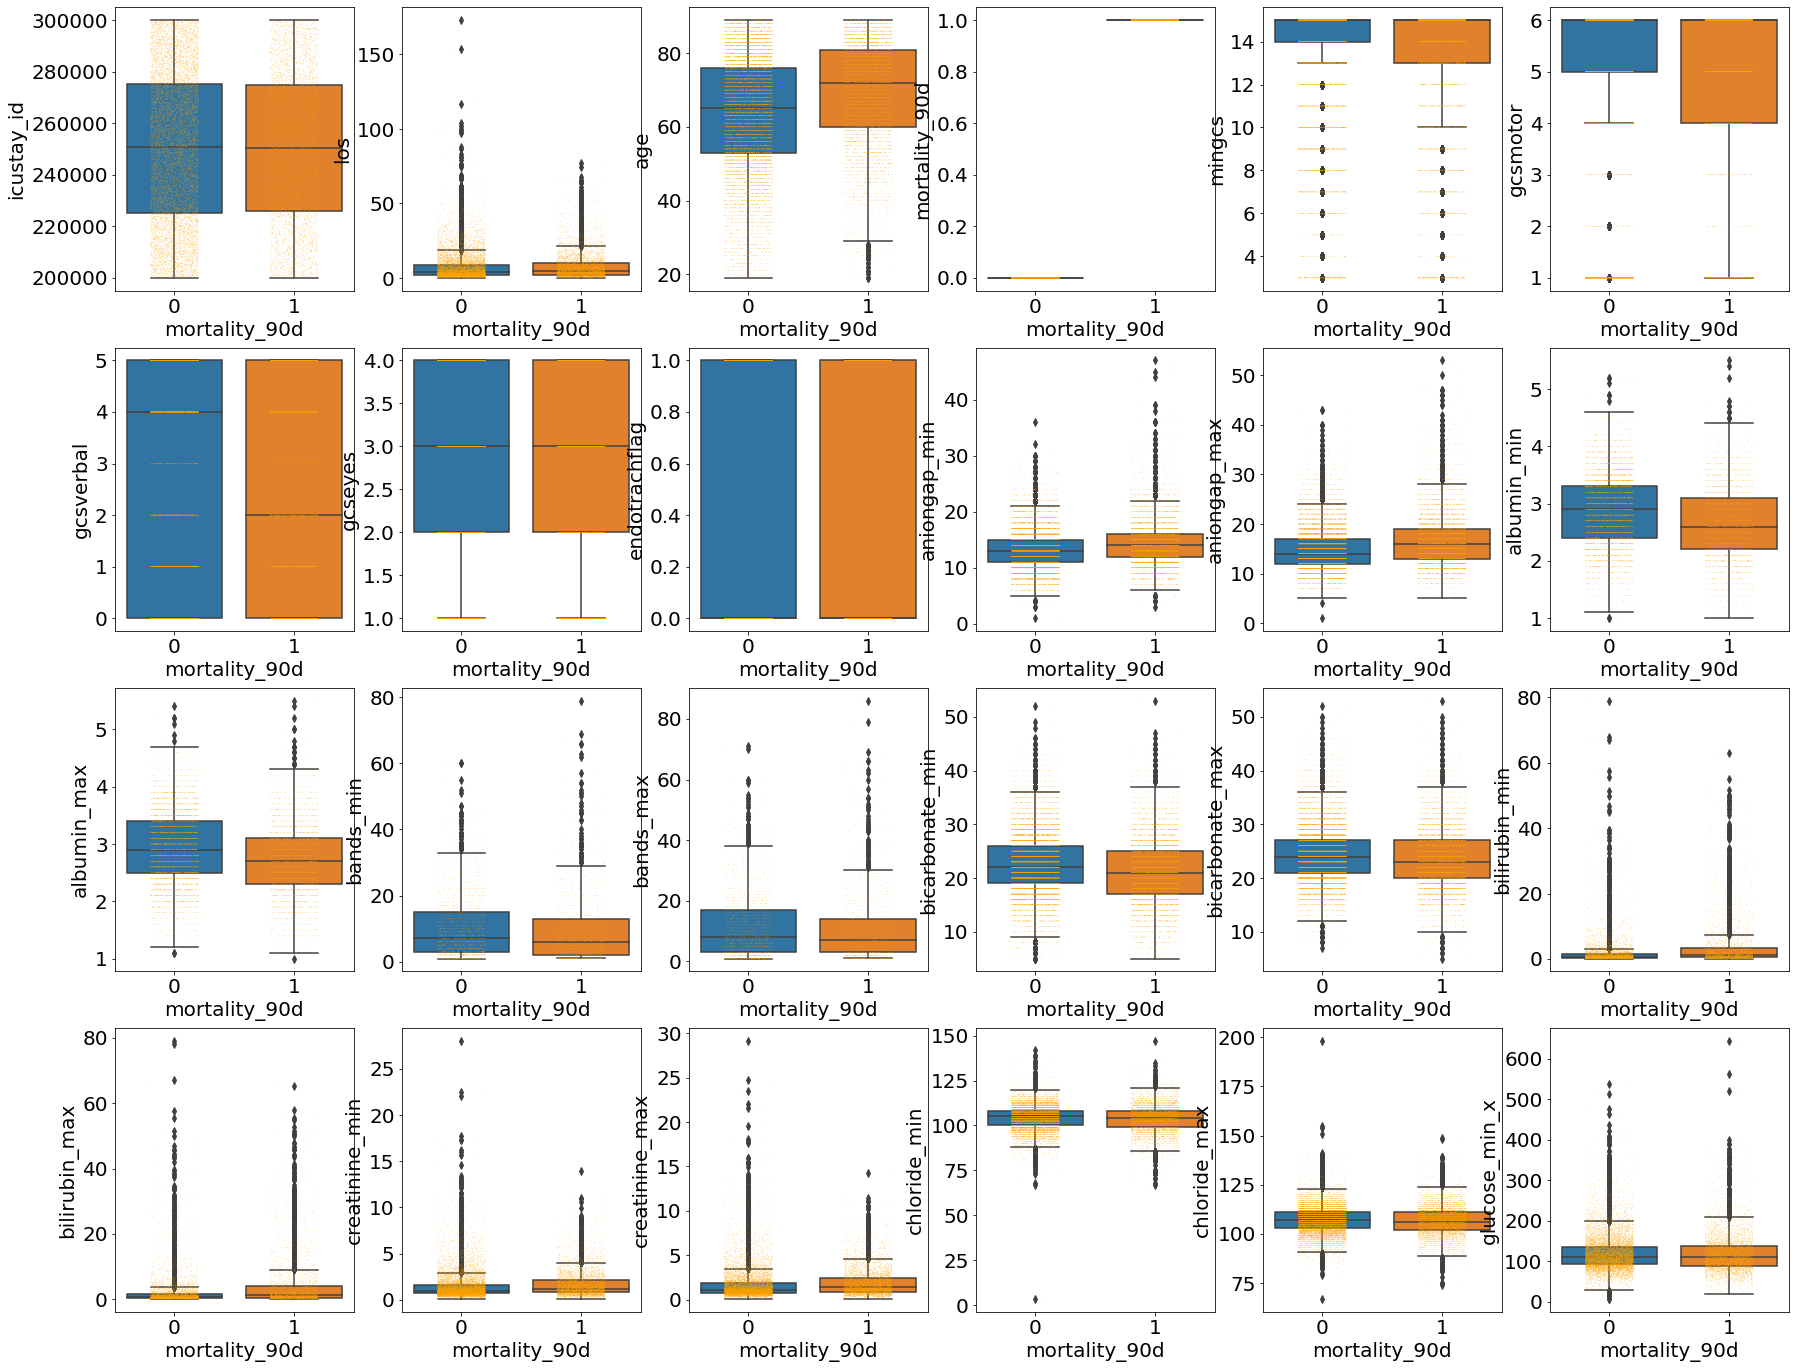

In [109]:
fig = plt.figure(figsize=(30,24))
count = 0
for variable in All_num.columns[:24]:
    count += 1
    plt.subplot(4, 6, count)
    
    ax = sns.boxplot(x = 'mortality_90d', y=variable, data=All_num)
    ax = sns.stripplot(x = 'mortality_90d', y=variable, data=All_num, color="orange", jitter=0.2, size=0.5)

plt.show()

1. 以性別為分組 (設定：All.gender)
2. 顯示前六張欄位 (All_num數據)
3. 以2,3 或 3,2 顯示圖片

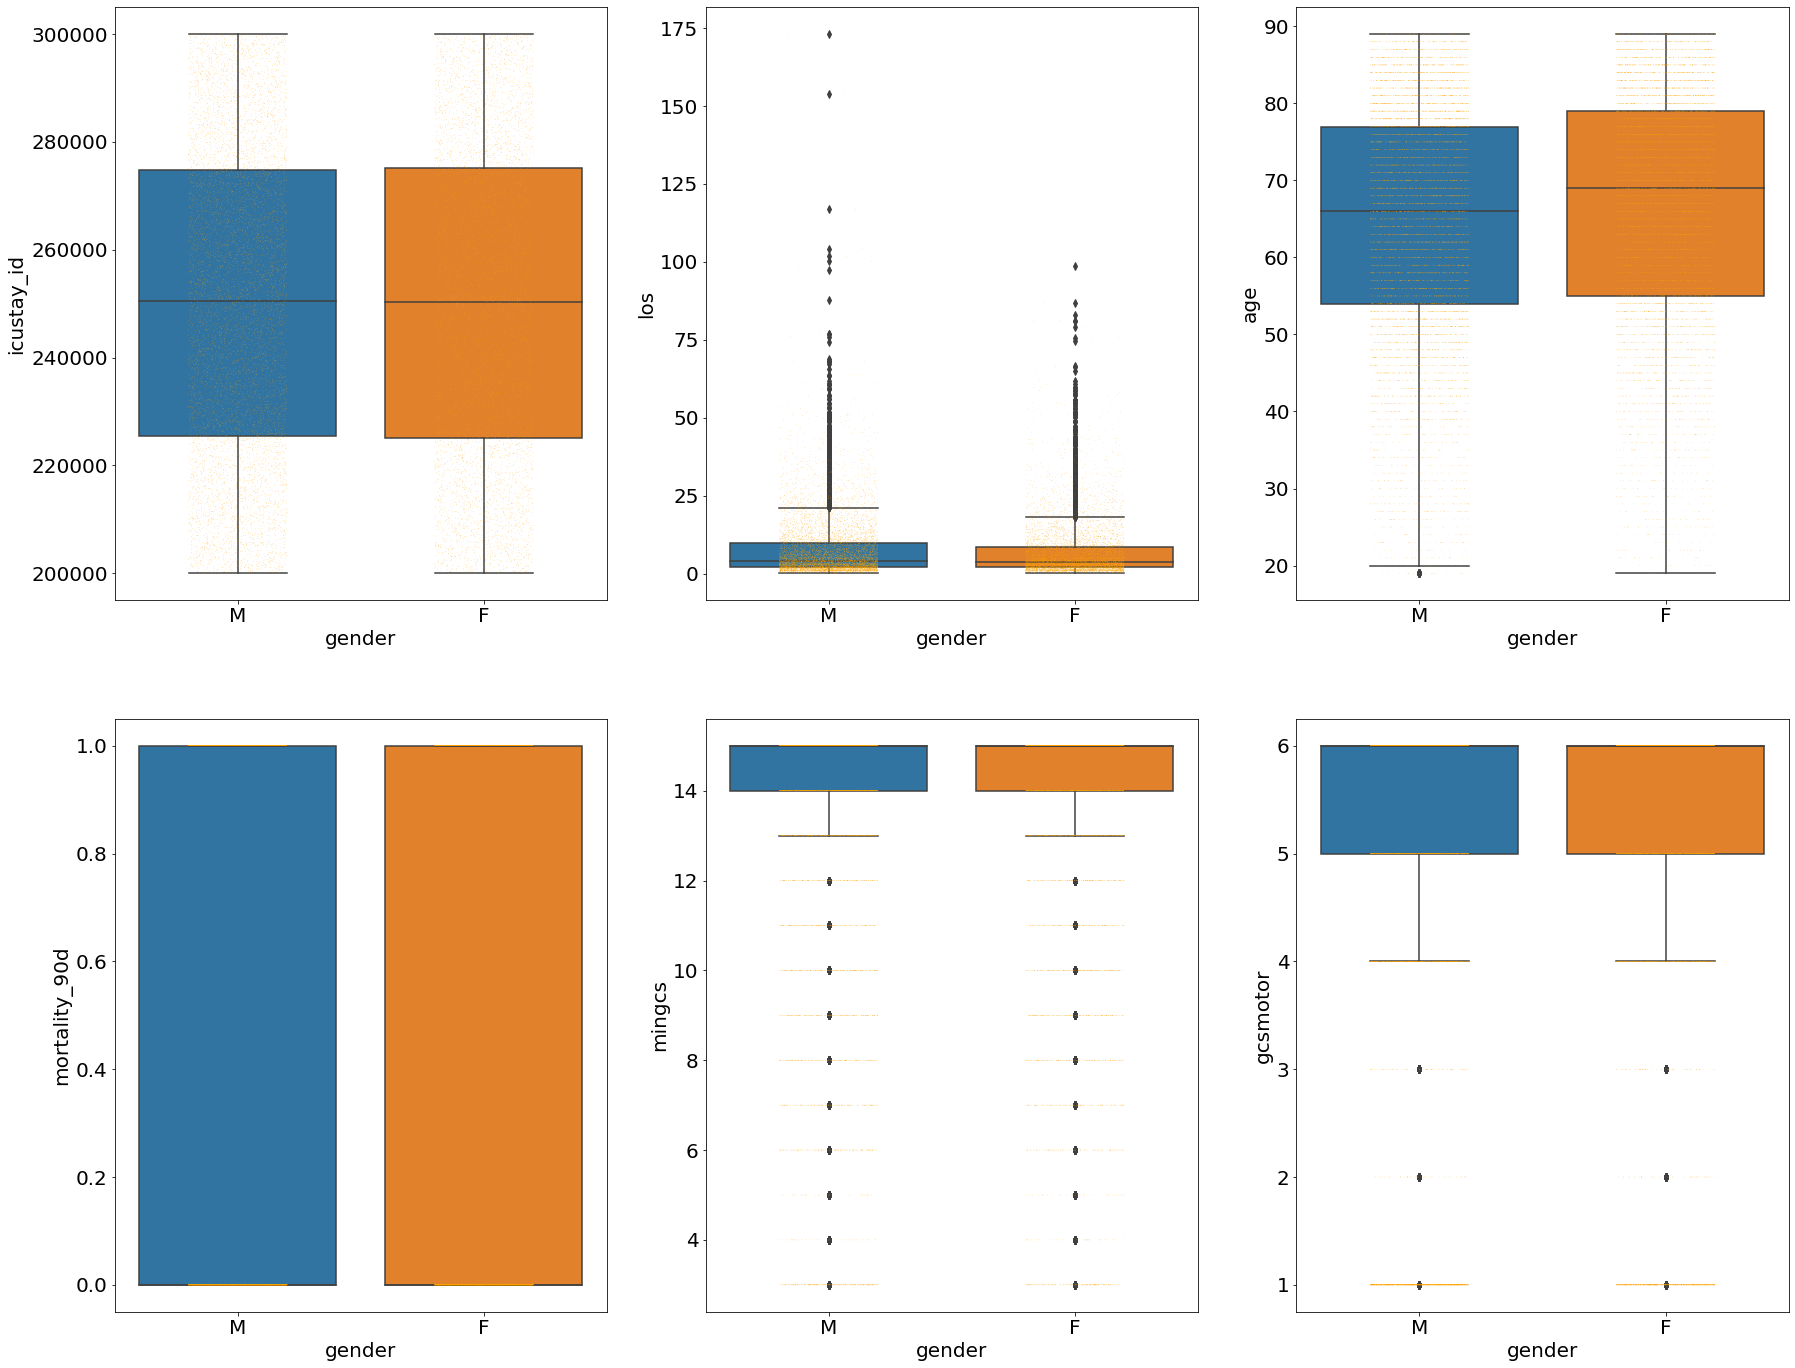

In [108]:
# 答案
fig = plt.figure(figsize=(30,24))
count = 0
for variable in All_num.columns[:6]:
    count += 1
    plt.subplot(2, 3, count)
    
    ax = sns.boxplot(x = All.gender, y=variable, data=All_num)
    ax = sns.stripplot(x = All.gender, y=variable, data=All_num, color="orange", jitter=0.2, size=0.5)

plt.show()

<AxesSubplot:xlabel='aniongap_max', ylabel='aniongap_min'>

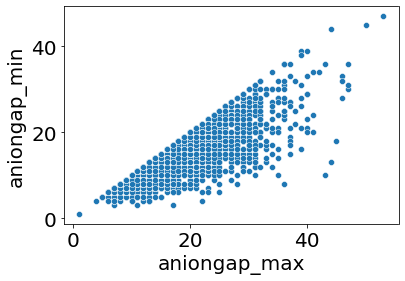

In [133]:
sns.scatterplot(data=All_num, x=All_num.columns[10], y=All_num.columns[9])

<AxesSubplot:xlabel='aniongap_max', ylabel='aniongap_min'>

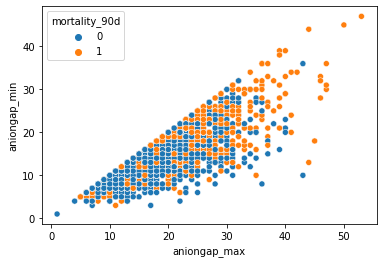

In [22]:
## scatter plot

## 兩個變數

sns.scatterplot(data=All_num, x=All_num.columns[10], y=All_num.columns[9],hue ='mortality_90d')


([<matplotlib.patches.Wedge at 0x7fce545493a0>,
 [Text(0.19368757932160904, 1.0828135211644412, 'age<=30'),
  Text(-0.24861512342555186, -1.0715365231311986, '50<=age<30'),
  Text(1.0985708217841368, -0.056054879578201044, 'age>50')],
 [Text(0.10564777053905948, 0.590625556998786, '44%'),
  Text(-0.13560824914121009, -0.5844744671624719, '54%'),
  Text(0.5992204482458927, -0.03057538886083693, '2%')])

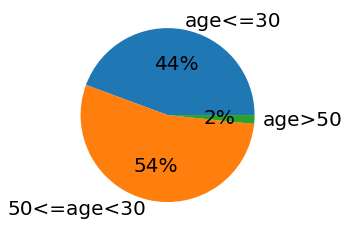

In [132]:
## pie chart
## count
## autopct 第一位數：位置，小數點後：四捨五入，%：是否要顯示百分位
size = [len(All_num[All_num.age>50]) , len(All_num[((All_num.age > 30) | (All_num.age <=50))])
        ,len(All_num[All_num.age<=30])]
label = ["age<=30", "50<=age<30", "age>50"]
plt.pie(size , labels = label, autopct='%1.0f%%')


1. 以圓餅圖顯示mortality的資訊

([<matplotlib.patches.Wedge at 0x7fce614a06d0>,
 [Text(-0.5985452087514628, 0.9228995790879244, 'non-Mortality'),
  Text(0.5985452951595547, -0.9228995230480735, 'Mortality')],
 [Text(-0.32647920477352516, 0.5033997704115951, '68%'),
  Text(0.3264792519052116, -0.5033997398444037, '32%')])

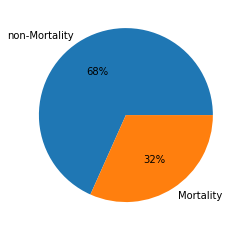

In [23]:
size = [len(All_num[All_num.mortality_90d==0]) , len(All_num[All_num.mortality_90d==1])]
label = ['non-Mortality','Mortality']
plt.pie(size , labels = label, autopct='%1.0f%%')


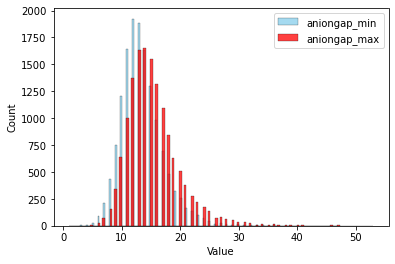

In [24]:
## Histogram
## 不區分類別

sns.histplot( All_num[All_num.columns[9]] , color="skyblue", label=All_num.columns[9])
sns.histplot( All_num[All_num.columns[10]] , color="red", label=All_num.columns[10])
plt.xlabel("Value")
#plt.ylabel("")
plt.legend()


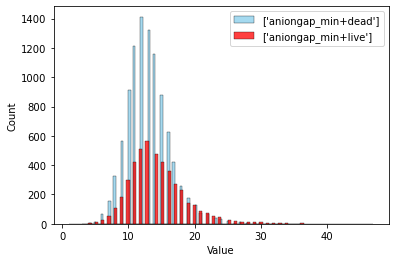

In [25]:
## Histogram
## 不區分類別

sns.histplot( All_num[All_num.columns[9]][All_num.mortality_90d==0] , color="skyblue", label=[All_num.columns[9]+"+dead"])
sns.histplot( All_num[All_num.columns[9]][All_num.mortality_90d==1] , color="red", label=[All_num.columns[9]+"+live"])
plt.xlabel("Value")
#plt.ylabel("")
plt.legend(loc='best', bbox_to_anchor=(1, 1))


## 3. 視覺化呈現資料以時間排列

# 視覺化各種時段數據偵測，或者藥物使用劑量
## 1. 整合chartevents、D_items、icustay
## 2. 參考網址 [https://github.com/MIT-LCP/mimic-iii-paper]

In [41]:
import time
t1 = time.time()
# !/root/anaconda3/bin/pip install psycopg2-binary

## 連線postgresql的套件
import psycopg2
## 建立資料結構的套件，使用於資料處理，如：分割、合併等等 (Python data analysis)
import pandas as pd

## 設定連接資料庫參數
conn = psycopg2.connect(database="mimic", user="twmimicviewer", 
                        password="twmimicviewer@1234", host="203.145.218.182", port="5432")

## 連接上資料庫，抓取資料。

## 允許python執行postgresql語法
with conn.cursor() as cur:

    ## 觀察查詢筆數
    print(cur.rowcount)
    
    ## SQL語法
    sql = """
    SELECT ce.icustay_id
      , ce.charttime
      , ce.charttime - ie.intime AS icutime
      , di.label
      , ce.value
      , ce.valuenum
      , ce.valueuom
    FROM mimiciii.chartevents ce
    INNER join mimiciii.d_items di
    ON ce.itemid = di.itemid
    INNER join mimiciii.icustays ie
    ON ce.icustay_id = ie.icustay_id
    WHERE ce.icustay_id = 276024
    AND error != 1
    ORDER BY ce.charttime
    """
    
    ## 執行sql語法
    cur.execute(sql)
    
    ## 取得欄位名稱
    name = [desc[0] for desc in cur.description]
    
    ## fetchall是將所有收尋的資料都寫入 rows 中
    # rows = pd.DataFrame(cur.fetchall())
    rows = pd.DataFrame(cur.fetchall(),columns=name)
    
t2 = time.time()
print('time elapsed: ' + str(round(t2-t1, 2)) + ' seconds')  

-1
time elapsed: 13.88 seconds


In [42]:
rows.shape

(9487, 7)

In [43]:
rows.head()

,icustay_id,charttime,icutime,label,value,valuenum,valueuom
0,276024,2133-01-24 17:00:00,-1 days +23:31:53,Arterial Blood Pressure diastolic,64,64.0,mmHg
1,276024,2133-01-24 17:00:00,-1 days +23:31:53,Arterial Blood Pressure mean,83,83.0,mmHg
2,276024,2133-01-24 17:00:00,-1 days +23:31:53,Arterial Blood Pressure systolic,115,115.0,mmHg
3,276024,2133-01-24 17:28:00,-1 days +23:59:53,Heart Rate,76,76.0,bpm
4,276024,2133-01-24 17:28:00,-1 days +23:59:53,Patient Location,CC5B,NaN,None


In [99]:
## dt.days，顯示天數
## dt.seconds，計算小於1天數據，以秒數顯示
#rows.icutime.dt.days

array([0.98047454, 0.99991898, 0.00547454, 0.01311343, 0.01450231,
       0.01728009, 0.02144676, 0.0221412 , 0.02353009, 0.03325231,
       0.03672454, 0.03741898, 0.04297454, 0.04505787, 0.05061343,
       0.05130787, 0.0533912 , 0.05547454, 0.06380787, 0.06450231,
       0.06797454, 0.09366898, 0.10130787, 0.10547454, 0.10686343,
       0.11103009, 0.11311343, 0.1158912 , 0.12630787, 0.13186343,
       0.1471412 , 0.14783565, 0.15200231, 0.16519676, 0.1658912 ,
       0.17005787, 0.17144676, 0.18880787, 0.19297454, 0.22491898,
       0.23047454, 0.2533912 , 0.25408565, 0.2721412 , 0.27769676,
       0.27908565, 0.29297454, 0.29853009, 0.3096412 , 0.31103009,
       0.31380787, 0.32144676, 0.35200231, 0.35547454, 0.3971412 ,
       0.40825231, 0.41658565, 0.43047454, 0.43880787, 0.48047454,
       0.48672454, 0.48741898, 0.5221412 , 0.54019676, 0.56380787,
       0.56728009, 0.58116898, 0.60547454, 0.61103009, 0.61658565,
       0.6471412 , 0.64783565, 0.65269676, 0.6533912 , 0.65408

In [46]:
print(rows['icutime'][0])
print(rows['icutime'].dt.seconds[0])
## 23(h)*60*60+31(m)*60+53(s)
print(rows['icutime'].dt.days[0])

-1 days +23:31:53
84713
-1


In [45]:
# 去除超過某個時間後的資料
maxdays = 5;
rows = rows.loc[rows.icutime.dt.days<=maxdays]

In [47]:
# 將時間資料轉換成以小時為單位
rows['icutimehr'] = (rows['icutime'].dt.seconds/60/60)+(rows['icutime'].dt.days*24)

In [103]:
# 不能用list
dict(rows['label'].value_counts())

{'Heart Rate': 167,
 'Arterial Blood Pressure mean': 165,
 'Arterial Blood Pressure systolic': 164,
 'Arterial Blood Pressure diastolic': 164,
 'O2 saturation pulseoxymetry': 162,
 'Respiratory Rate': 161,
 'Heart Rhythm': 144,
 'Central Venous Pressure': 134,
 'Safety Measures_U_1': 111,
 'Temperature Site': 95,
 'Temperature Fahrenheit': 94,
 'Impaired Skin Site #4': 91,
 'CO (Arterial)': 84,
 'SVV (Arterial)': 75,
 'Ectopy Type 1': 74,
 'Assistance Device': 53,
 'Head of Bed': 53,
 'Activity': 52,
 'Activity Tolerance': 52,
 'Position': 52,
 'Turn': 50,
 'Therapeutic Bed': 48,
 'Anti Embolic Device': 48,
 'Anti Embolic Device Status': 48,
 'Pressure Reducing Device': 45,
 'PEEP set': 43,
 'Inspired O2 Fraction': 43,
 'PH (Arterial)': 42,
 'Pain Assessment Method': 42,
 'Respiratory Rate (Set)': 42,
 'Pain Present': 41,
 'Arterial CO2 Pressure': 41,
 'Arterial O2 pressure': 41,
 'Tidal Volume (set)': 41,
 'TCO2 (calc) Arterial': 41,
 'Arterial Base Excess': 41,
 'Inspiratory Time': 4

In [49]:
# 得到三種數據的平均值
hr_mean = rows.valuenum[rows.label=='Heart Rate'].mean()
bp_mean = rows.icutimehr[rows.label=='Non Invasive Blood Pressure mean'].mean()
temp_mean = ((rows.valuenum[rows.label=='Temperature Fahrenheit']-32)/1.8).mean()

# 列出平均數值
print("Mean HR is: {0:.2f}".format(hr_mean))
print("Mean BP is: {0:.2f}".format(bp_mean))
print("Mean temp, C is: {0:.2f}".format(temp_mean))

Mean HR is: 100.56
Mean BP is: 57.90
Mean temp, C is: 36.38


In [50]:
# 得到三種數據的平均值
hr_describe = rows.valuenum[rows.label=='Heart Rate'].describe()
bp_describe = rows.icutimehr[rows.label=='Non Invasive Blood Pressure mean'].describe()
temp_describe = ((rows.valuenum[rows.label=='Temperature Fahrenheit']-32)/1.8).describe()

# 列出平均數值
print("Describe HR is:\n",hr_describe,"\n")
print("Describe BP is:\n",bp_describe,"\n")
print("Describe temp is:\n",temp_describe,"\n")

Describe HR is:
 count    167.000000
mean     100.556886
std       14.334475
min       68.000000
25%       93.500000
50%      101.000000
75%      110.000000
max      142.000000
Name: valuenum, dtype: float64 

Describe BP is:
 count     3.000000
mean     57.898056
std      16.757643
min      48.181389
25%      48.223056
50%      48.264722
75%      62.756389
max      77.248056
Name: icutimehr, dtype: float64 

Describe temp is:
 count    94.000000
mean     36.381797
std       0.798713
min      34.055556
25%      35.847222
50%      36.583333
75%      36.930556
max      37.888889
Name: valuenum, dtype: float64 



([<matplotlib.axis.YTick at 0x7fce6141a9d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

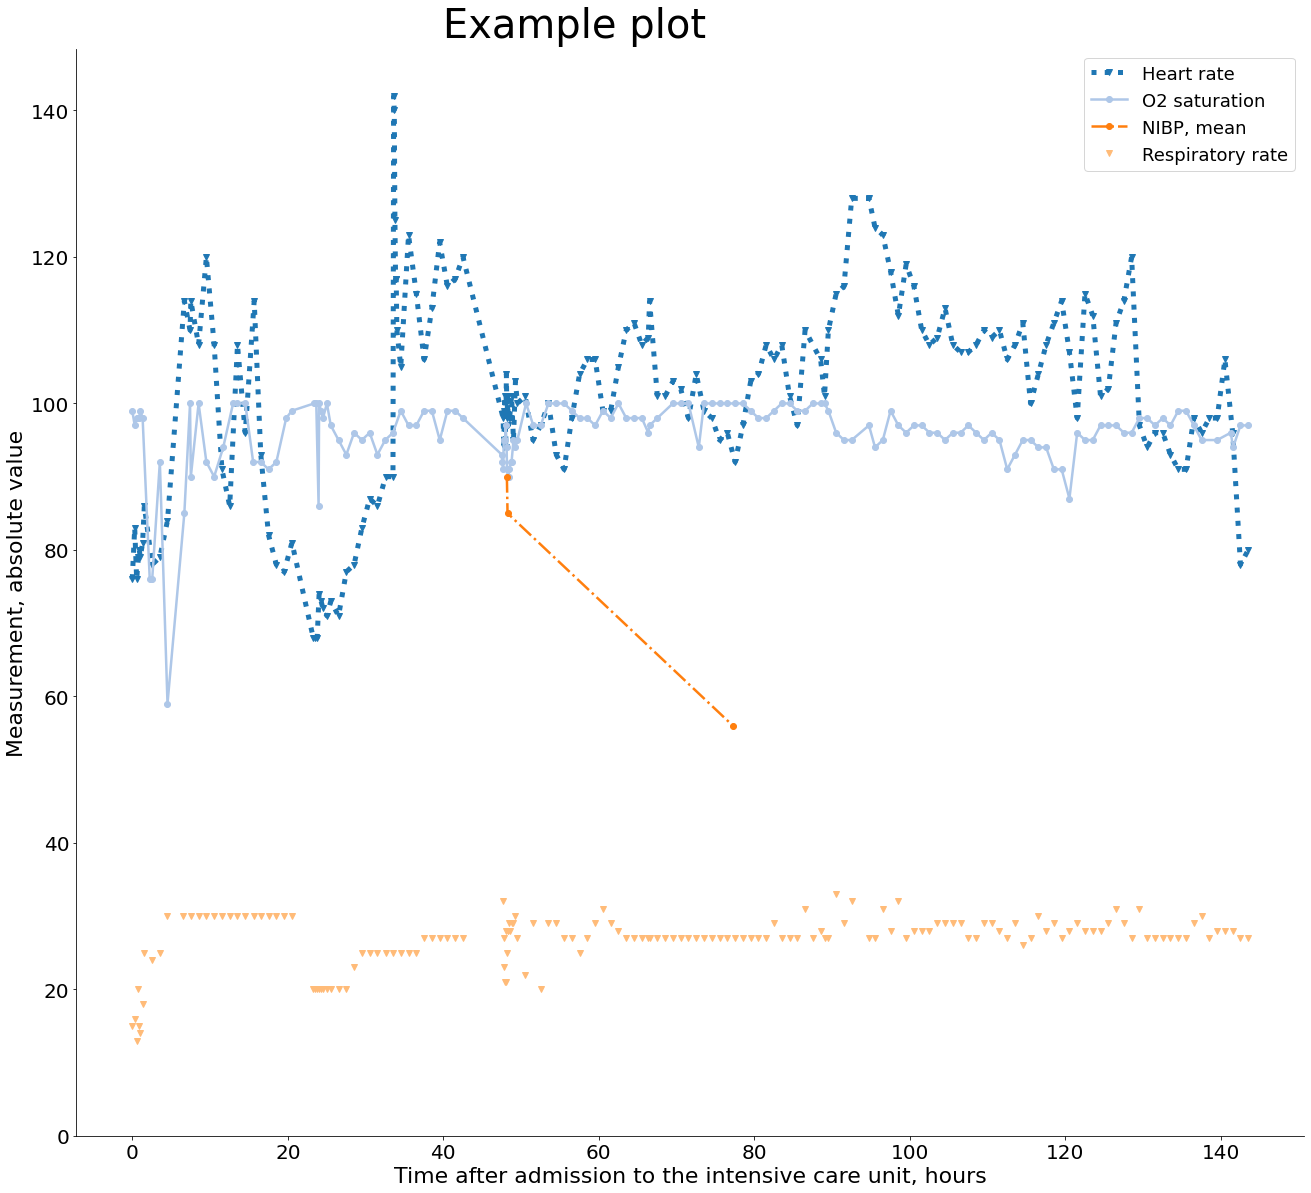

In [96]:
# 設定圖片大小 寬*高
fig = plt.figure(figsize=(22, 20))
## 設定XY軸，字大小
plt.rcParams.update({'font.size': 20})

# 設定RGB顏色 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120)]  

# 因為設定的RGB值域必須在0-1
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    

# 設定的周圍線顯示狀況
# 圖片位置：subplot(xyz)位置
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  

# 畫圖
## plot(x,y,color:顏色, lw:線的寬, ls:點連線的方式, marker:點的形狀, markersize:點的大小, label:在圖示的名稱)

# Marker : https://matplotlib.org/3.3.2/api/markers_api.html#module-matplotlib.markers
plt.plot(rows.icutimehr[rows.label=='Heart Rate'], 
         rows.valuenum[rows.label=='Heart Rate'],
         color=tableau20[0], 
         lw=5, ls=":",
         marker='v', markersize=6, label='Heart rate')

plt.plot(rows.icutimehr[rows.label=='O2 saturation pulseoxymetry'], 
         rows.valuenum[rows.label=='O2 saturation pulseoxymetry'],
         color=tableau20[1], 
         lw=2.5, ls="-",
         marker='o', markersize=6, label='O2 saturation')

plt.plot(rows.icutimehr[rows.label=='Non Invasive Blood Pressure mean'], 
         rows.valuenum[rows.label=='Non Invasive Blood Pressure mean'],
         color=tableau20[2], 
         lw=2.5, ls="-.",
         marker='o', markersize=6, label='NIBP, mean')

plt.plot(rows.icutimehr[rows.label=='Respiratory Rate'], 
         rows.valuenum[rows.label=='Respiratory Rate'],
         color=tableau20[3], 
         lw=2.5, ls="",
         marker='v', markersize=6, label='Respiratory rate')

plt.plot(rows.icutimehr[rows.label=='Respiratory Rate'], 
         rows.valuenum[rows.label=='Respiratory Rate'],
         color=tableau20[3], 
         lw=2.5, ls="",
         marker='v', markersize=6, label='Respiratory rate')

# 圖示設定
plt.legend(loc=1,fontsize=18)

# 貼上各種文字
plt.text(40,150,"Example plot",fontsize=40)
# X軸名稱
plt.xlabel('Time after admission to the intensive care unit, hours', fontsize=22)
# Y軸名稱
plt.ylabel('Measurement, absolute value', fontsize=22)
# y軸數值顯示
plt.yticks(np.arange(0, 160, 20))



# 圖片儲存
#fig.savefig('examplepatient.pdf', bbox_inches='tight')

## 4. 取出病患待在ICU病房時間

In [29]:
# !/root/anaconda3/bin/pip install psycopg2-binary

## 連線postgresql的套件
import psycopg2
## 建立資料結構的套件，使用於資料處理，如：分割、合併等等 (Python data analysis)
import pandas as pd

## 設定連接資料庫參數
conn = psycopg2.connect(database="mimic", user="twmimicadmin", 
                        password="twmimicadmin@1234", host="203.145.218.182", port="5432")

## 連接上資料庫，抓取資料。

## 允許python執行postgresql語法
with conn.cursor() as cur:
    
    time = pd.DataFrame()
    ## SQL語法
    for n in All_f.icustay_id:
        sql = """
        SELECT
            icu.icustay_id
            , ma.deathtime-icu.INTIME AS leavetime
        FROM mimiciii.icustays icu
        JOIN mimiciii.admissions ma
        ON icu.HADM_ID = ma.HADM_ID
        WHERE icu.icustay_id = """+ str(n)+""" """
        
        cur.execute(sql)
        ## 取得欄位名稱
        #name = [desc[0] for desc in cur.description]

        ## fetchall是將所有收尋的資料都寫入 rows 中
        out = pd.DataFrame(cur.fetchall())
        time = pd.concat([time,out])
    
time.columns = ["icustay_id","leavetime"]


In [30]:
time.leavetime = (time.leavetime.dt.seconds/60/60)+(time.leavetime.dt.days*24)

In [31]:
Output = pd.merge(time,All_f,on="icustay_id")

In [32]:
Output.head()

,icustay_id,leavetime,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,dob,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,233.694722,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,2127-12-23 00:00:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,NaN,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,None,2141-10-05 15:15:00.000,2063-12-13 00:00:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,NaN,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,NaN,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,NaN,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,None,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [36]:
Output.leavetime[-Output.leavetime.isna()]

0        233.694722
9        835.026944
15         4.671111
17        37.500556
18        -0.033889
            ...    
14786    142.853333
14801    211.561667
14806    151.364722
14809    376.632778
14810    157.788333
Name: leavetime, Length: 3139, dtype: float64

In [37]:
Output.to_csv("Data.csv")